In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image  
import utils

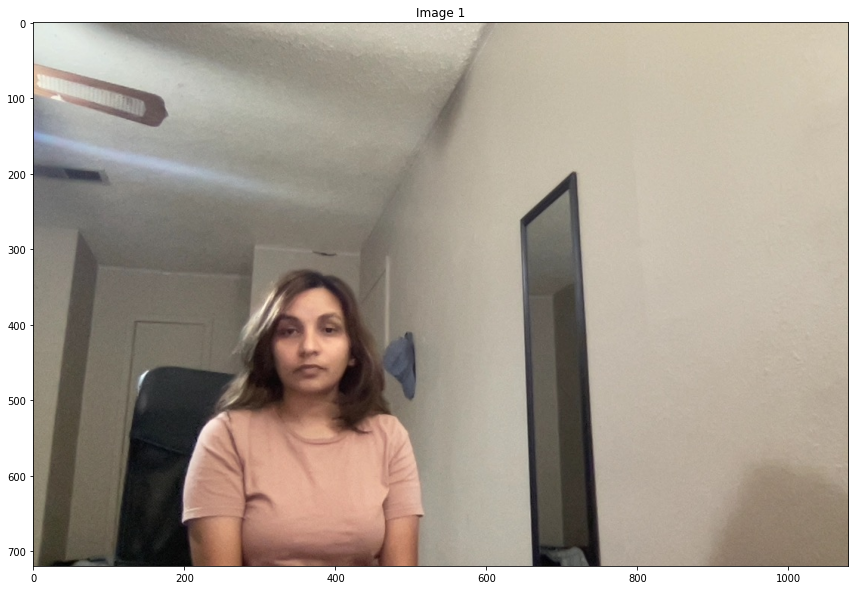

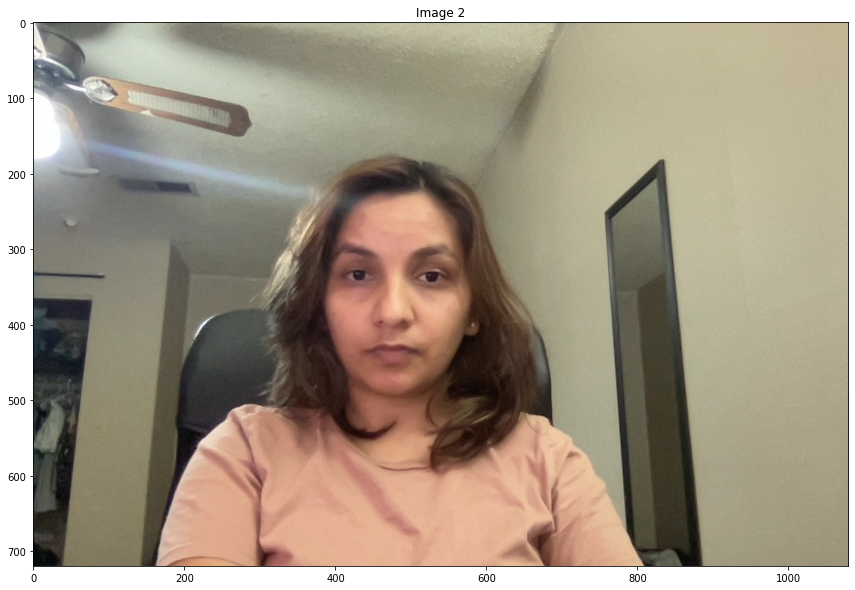

In [2]:
# Import the 2 images from gdrive
img1= cv2.imread('../CompVisionImage/Image1.jpg')
img2 = cv2.imread('../CompVisionImage/Image2.jpg')

# convert the images from bgr to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# show the images for reference
plt.figure(figsize=(20,10))
plt.imshow(img1)
plt.title('Image 1')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(img2)
plt.title('Image 2')
plt.show()


(720, 1080)


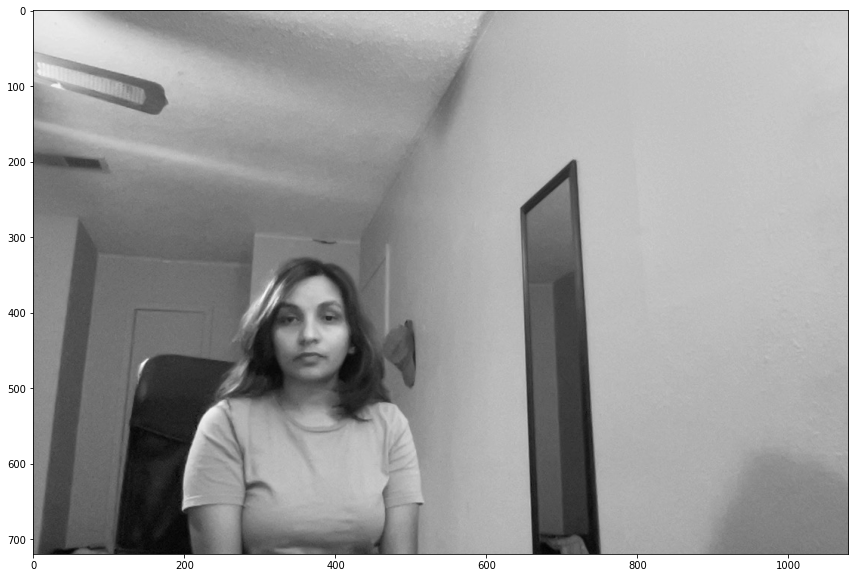

In [3]:
gray= cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
print(gray.shape)

plt.figure(figsize=(20,10))
plt.imshow(gray,cmap='gray', vmin=0, vmax=255)
plt.show()

[ WARN:0@1.355] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


(720, 1080, 3)


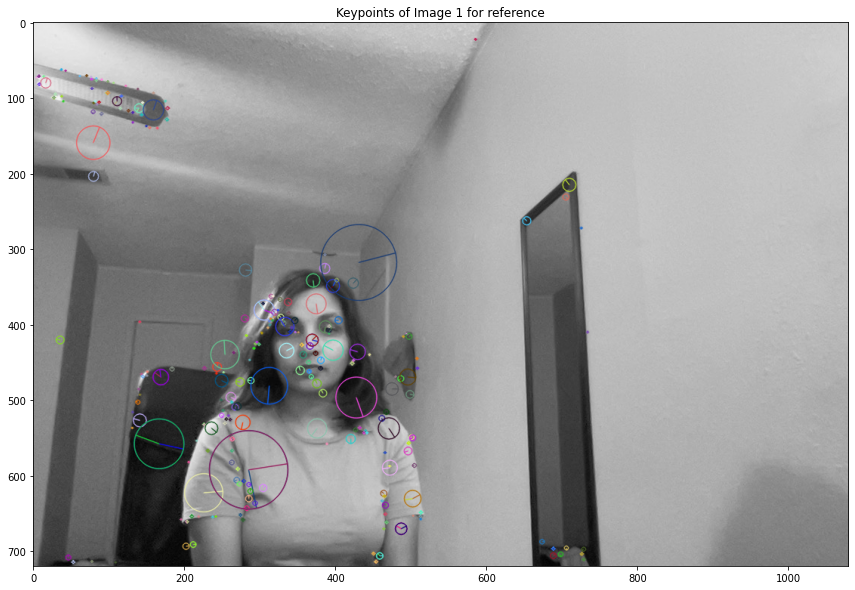

In [4]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

keypoints=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img1)

print(keypoints.shape)
plt.figure(figsize=(20,10))
plt.imshow(keypoints)
plt.title('Keypoints of Image 1 for reference')
plt.show()

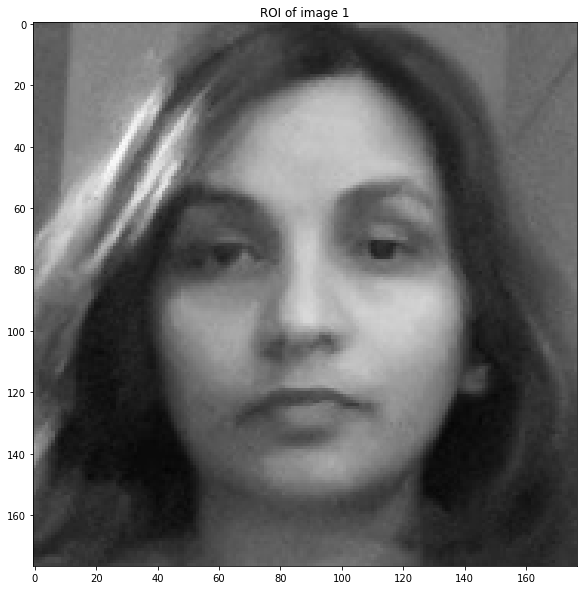

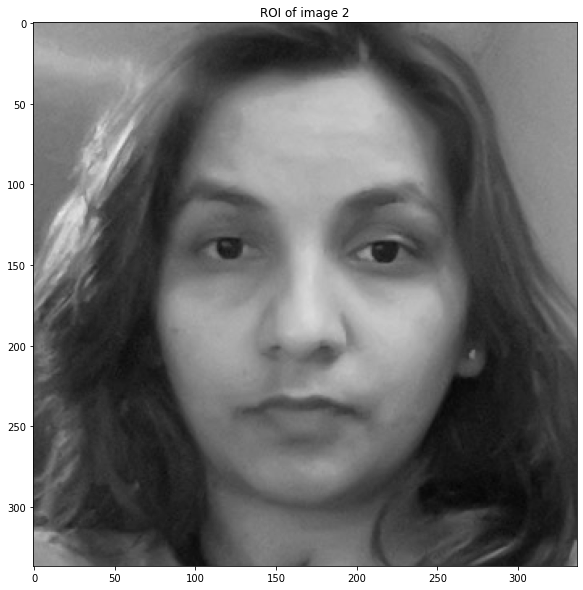

In [5]:
# for face detection
cascPath="/usr/local/lib/python3/site-packages/cv2/data/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2= cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

gray=[gray1,gray2]

# detect faces in the 2 images
faces1 = face_cascade.detectMultiScale(gray1, 1.3, 5)
faces2 = face_cascade.detectMultiScale(gray2, 1.3, 5)
roi_gray=[]
roi_color=[]

size=gray1.shape

# crop out only the face of the first and second images
for (x,y,w,h) in faces1:

    extra=int(w/6)
    x1=max(0,x-extra)
    y1=max(0,y-extra)
    x2=min(size[1],x1+2*extra+w)
    y2=min(size[0],y1+2*extra+w)

    img1 = cv2.rectangle(img1,(x1,y1),(x2-1,y2-1),(0,0,255),4)
    roi_gray .append(gray1[y1:y2, x1:x2])
    roi_color .append(img1[y1:y2, x1:x2])

if len(faces1)==0:
  roi_gray .append(gray1)
  roi_color .append(img1)
    
size=gray2.shape
for (x,y,w,h) in faces2:

    extra=int(w/6)
    x1=max(0,x-extra)
    y1=max(0,y-extra)
    x2=min(size[1],x1+2*extra+w)
    y2=min(size[0],y1+2*extra+w)

    img2 = cv2.rectangle(img2,(x1,y1),(x2-1,y2-1),(0,0,255),4)
    roi_gray .append(gray2[y1:y2, x1:x2])
    roi_color .append(img2[y1:y2, x1:x2])

if len(faces2)==0:
  roi_gray .append(gray2)
  roi_color .append(img2)

# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# roi_color=cv2.cvtColor(roi_color,cv2.COLOR_BGR2RGB)

# plot the cropped out grayscale images of the originals
plt.figure(figsize=(20,10))
plt.imshow(roi_gray[0],cmap='gray', vmin=0, vmax=255)
plt.title('ROI of image 1')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(roi_gray[1],cmap='gray', vmin=0, vmax=255)
plt.title('ROI of image 2')
plt.show()

In [6]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(roi_gray[0],None)
kp2, des2 = sift.detectAndCompute(roi_gray[1],None)

bf = cv2.BFMatcher(

    )

matches=bf.knnMatch(des1,des2,k=2)
len(matches[0])

2

In [7]:
# Apply ratio test to filter out only the good matches
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

It's a Match


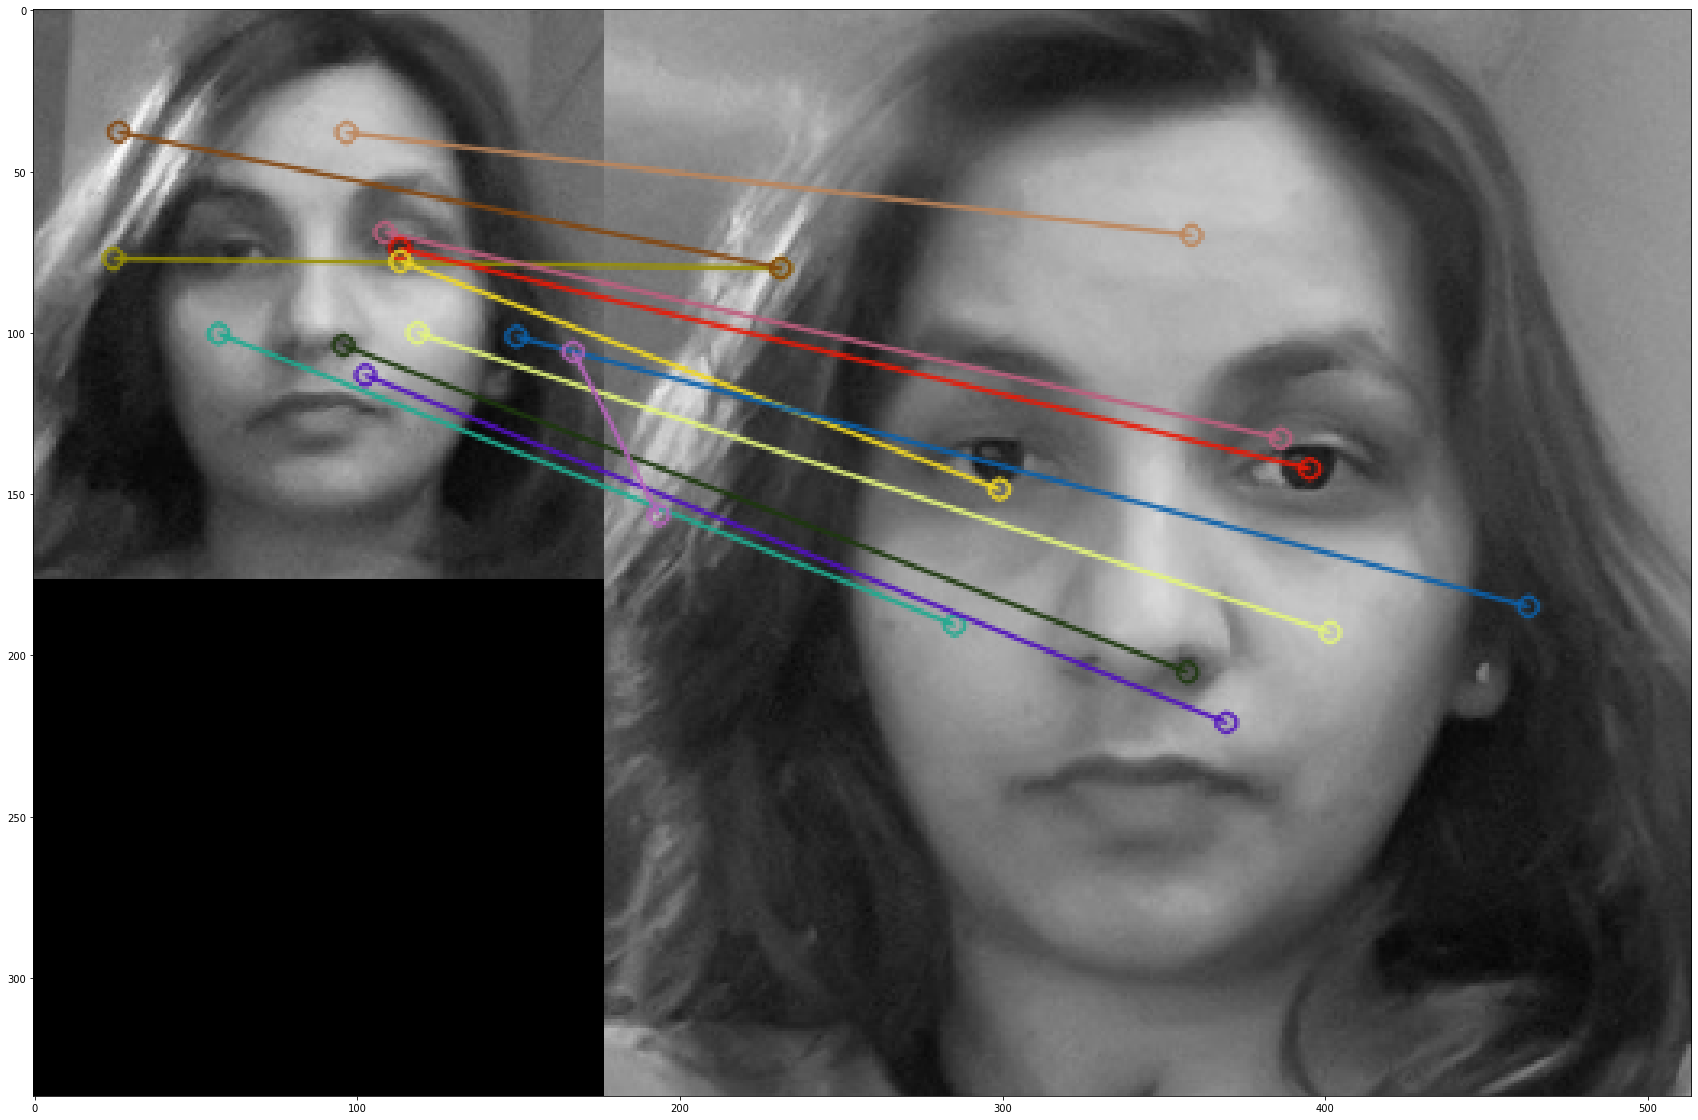

In [8]:


# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(roi_gray[0],kp1,roi_gray[1],kp2,good,None,flags=2)
if len(good)>=12:
  print("It's a Match")

else:
  print("Not a Match")


plt.figure(figsize=(40,20))
plt.imshow(img3)
plt.show()